<a href="https://colab.research.google.com/github/Ash100/Phylogeny/blob/main/Matrix_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fol Plotting Matrix Data Prepared by Dr. Ashfaq Ahmad

In [10]:
from google.colab import files
uploaded = files.upload()

Saving rbcL_aligned_identity.1.csv to rbcL_aligned_identity.1.csv


In [11]:
import pandas as pd

# Replace 'matrix_file.csv' with the name of your uploaded file
matrix_file = 'rbcL_aligned_identity.1.csv'
matrix_df = pd.read_csv(matrix_file, header=None)
matrix = matrix_df.values

In [12]:
import pandas as pd

# Replace 'matrix_file.csv' with the name of your uploaded file
matrix_file = list(uploaded.keys())[0]  # Get the uploaded file name
matrix_df = pd.read_csv(matrix_file, sep='\t', header=None)

# Drop the first row and the first column to get the numeric data
matrix_numeric = matrix_df.drop(index=0, columns=0)

# Convert the DataFrame to a numpy array
matrix = matrix_numeric.apply(pd.to_numeric, errors='coerce').values

# Check the content of the numeric matrix
print(matrix)

[]


In [13]:
import pandas as pd

# Get the uploaded file name
matrix_file = list(uploaded.keys())[0]

# Read the file with tab-separated values
matrix_df = pd.read_csv(matrix_file, sep='\t', header=None)

# Inspect the first few rows to understand the structure
print(matrix_df.head())

# Drop the first row and the first column to get the numeric data
matrix_numeric = matrix_df.drop(index=0, columns=0)

# Convert the DataFrame to a numpy array, ensuring numeric conversion
matrix = matrix_numeric.apply(pd.to_numeric, errors='coerce').values

# Check the shape and content of the numeric matrix
print("Matrix shape:", matrix.shape)
print(matrix)

                                                   0
0  ,LC588401 Reference,LM652998 Quercus floribund...
1  LC588401 Reference,100,99.81,99.63,99.63,99.44...
2  LM652998 Quercus floribunda,99.81,100,99.81,99...
3  MF044952 Quercus baloot,99.63,99.81,100,100,99...
4  LM652975 Quercus aucheri,99.63,99.81,100,100,9...
Matrix shape: (23, 0)
[]


In [14]:
import numpy as np
# Remove any rows or columns that are entirely NaN
matrix = matrix[~np.isnan(matrix).all(axis=1)]
matrix = matrix[:, ~np.isnan(matrix).all(axis=0)]

# Check the shape and content of the cleaned numeric matrix
print("Cleaned Matrix shape:", matrix.shape)
print(matrix)

Cleaned Matrix shape: (0, 0)
[]


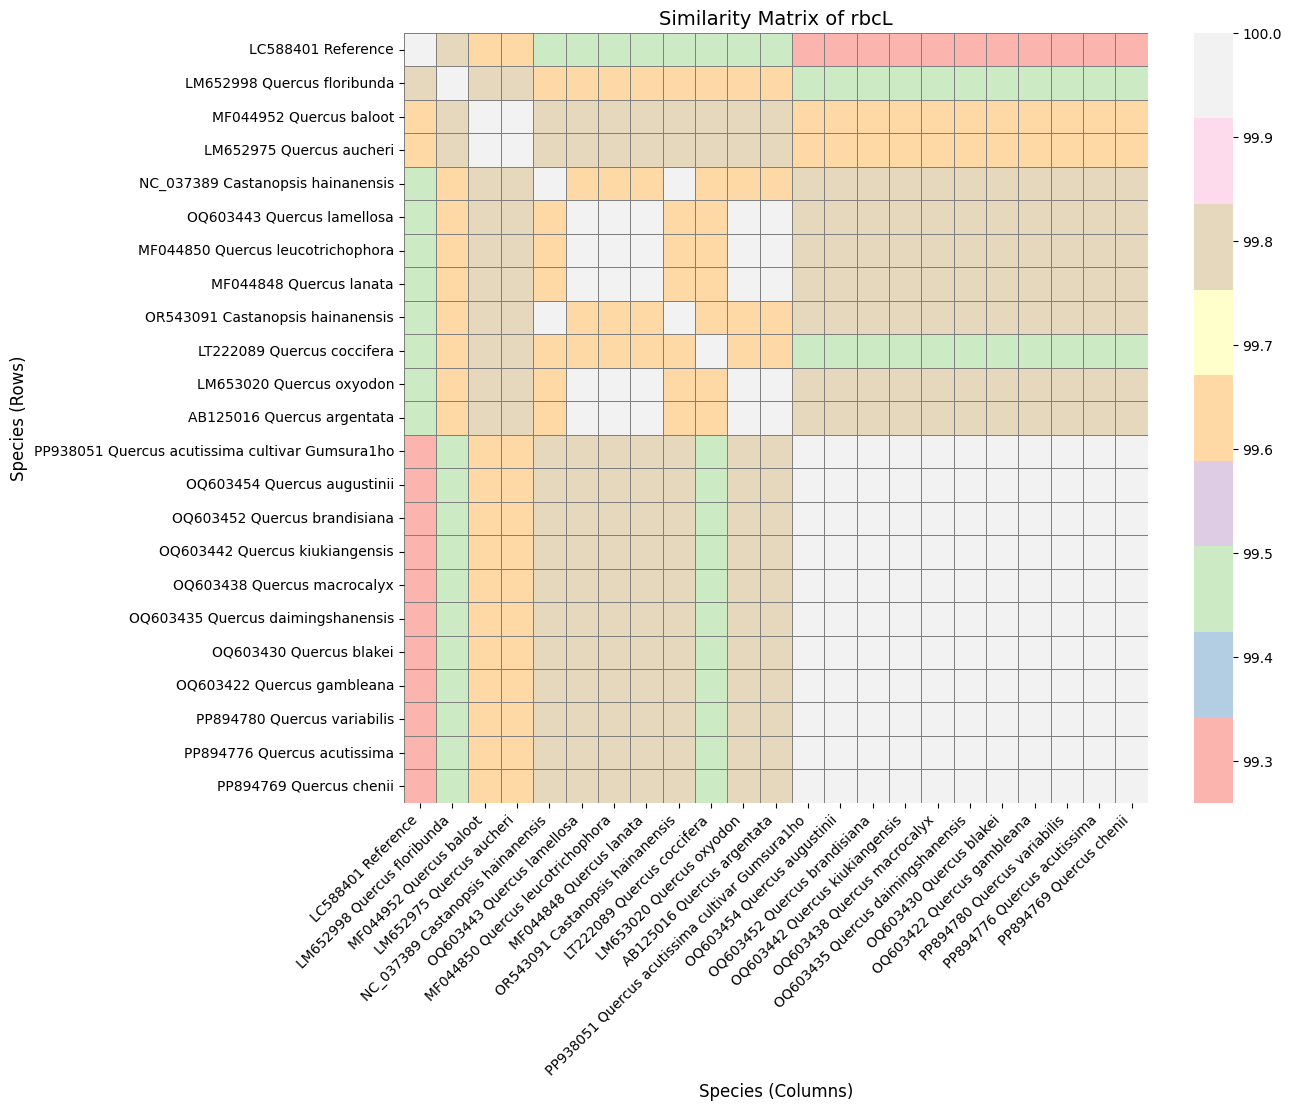

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/rbcL_aligned_identity.1.csv'  # Adjust the file path as necessary
df = pd.read_csv(file_path, index_col=0)

# Replace '-' with NaN and convert to a numeric matrix
df.replace('-', np.nan, inplace=True)
matrix = df.to_numpy(dtype=np.float64)

# Check if the matrix is empty
if matrix.size > 0:
    # Plot the matrix as a heatmap without annotations
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, cmap='Pastel1', annot=False, cbar=True,
                xticklabels=df.columns, yticklabels=df.index, linewidths=.7, linecolor='gray')
    plt.title('Similarity Matrix of rbcL', fontsize=14)
    plt.xlabel('Species (Columns)', fontsize=12)
    plt.ylabel('Species (Rows)', fontsize=12)

     # Set the x-tick and y-tick labels to italic using plt.setp
    plt.setp(ax.get_xticklabels(), fontstyle='italic')
    plt.setp(ax.get_yticklabels(), fontstyle='italic')

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.savefig('/content/Similarity_Matrix_of_rbcL.png', dpi=600, bbox_inches='tight')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/rbcL_aligned_identity.1.csv'  # Adjust the file path as necessary
df = pd.read_csv(file_path, index_col=0)

# Replace '-' with NaN and convert to a numeric matrix
df.replace('-', np.nan, inplace=True)
matrix = df.to_numpy(dtype=np.float64)

# Check if the matrix is empty
if matrix.size > 0:
    # Ensure the matrix is square
    assert matrix.shape[0] == matrix.shape[1], "Matrix is not square"

    # Plot the matrix as a heatmap without annotations
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, cmap='viridis', annot=False, cbar=True,
                xticklabels=df.columns, yticklabels=df.index, linewidths=.5, linecolor='gray')
    plt.title('Similarity Matrix of 1TSF', fontsize=16)
    plt.xlabel('Species (Columns)', fontsize=14)
    plt.ylabel('Species (Rows)', fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.savefig('/content/Similarity_Matrix_of_1TSF.png', dpi=600, bbox_inches='tight')
    plt.show()
else:
    print("The matrix is empty or not correctly loaded.")

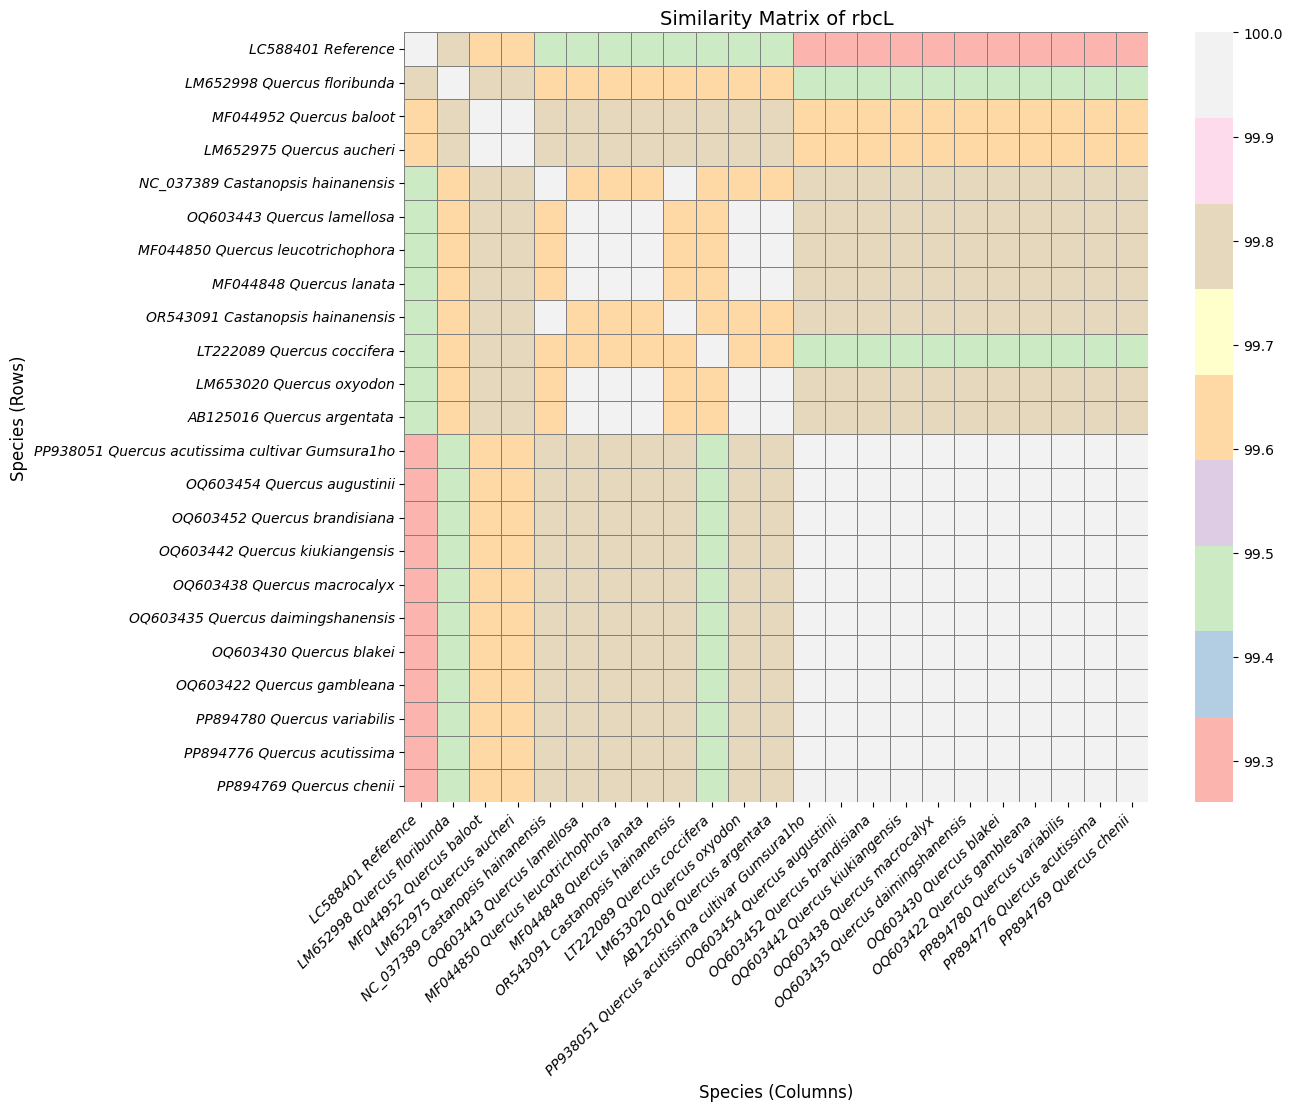

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/rbcL_aligned_identity.1.csv'  # Adjust the file path as necessary
df = pd.read_csv(file_path, index_col=0)

# Replace '-' with NaN and convert to a numeric matrix
df.replace('-', np.nan, inplace=True)
matrix = df.to_numpy(dtype=np.float64)

# Check if the matrix is empty
if matrix.size > 0:
    # Ensure the matrix is square
    assert matrix.shape[0] == matrix.shape[1], "Matrix is not square"

    # Normalize the data to handle NaNs appropriately
    # Here we're replacing NaNs with the mean of non-NaN values for demonstration purposes
    # You may choose a different strategy depending on your data
    matrix[np.isnan(matrix)] = np.nanmean(matrix)

    # Plot the matrix as a heatmap
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(matrix, cmap='Pastel1', annot=False, cbar=True,
                     xticklabels=df.columns, yticklabels=df.index, linewidths=.7, linecolor='gray')

    # Customize the heatmap
    plt.title('Similarity Matrix of rbcL', fontsize=14)
    plt.xlabel('Species (Columns)', fontsize=12)
    plt.ylabel('Species (Rows)', fontsize=12)

    # Set the x-tick and y-tick labels to italic using plt.setp
    plt.setp(ax.get_xticklabels(), fontstyle='italic')
    plt.setp(ax.get_yticklabels(), fontstyle='italic')

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Save and show the heatmap
    plt.savefig('/content/Similarity_Matrix_of_rbcL.png', dpi=600, bbox_inches='tight')
    plt.show()
else:
    print("The matrix is empty or not correctly loaded.")